In [133]:
import numpy as np      # For arrays
import pandas as pd     # Dataframes and manipulation
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# read csv file as Dataframe
sales = pd.read_csv("c:\For Internships & Job Applications\personal project\Sales Retail\supermarket sales\supermarket_sales - Sheet1.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [134]:
sales = sales.drop("Invoice ID", axis=1)
print(sales.shape)
print(sales.info())

(1000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income  

In [136]:
# Change name format to have underscore
sales.rename(columns={
    "Customer type": "CUSTOMER_TYPE",
    "Product line": "PRODUCT_LINE",
    "Unit price": "UNIT_PRICE",
    "Tax 5%": "TAX_5%",
    "gross margin percentage": "GROSS_MARGIN_PERCENTAGE",
    "gross income": "GROSS_INCOME"
}, inplace=True)

sales = sales.rename(columns=str.upper)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BRANCH                   1000 non-null   object 
 1   CITY                     1000 non-null   object 
 2   CUSTOMER_TYPE            1000 non-null   object 
 3   GENDER                   1000 non-null   object 
 4   PRODUCT_LINE             1000 non-null   object 
 5   UNIT_PRICE               1000 non-null   float64
 6   QUANTITY                 1000 non-null   int64  
 7   TAX_5%                   1000 non-null   float64
 8   TOTAL                    1000 non-null   float64
 9   DATE                     1000 non-null   object 
 10  TIME                     1000 non-null   object 
 11  PAYMENT                  1000 non-null   object 
 12  COGS                     1000 non-null   float64
 13  GROSS_MARGIN_PERCENTAGE  1000 non-null   float64
 14  GROSS_INCOME             

In [138]:
# Preparing training and testing datasets
# 70% train 30% test
X = sales.drop(columns=["TOTAL"])
y = sales["TOTAL"]

seed = np.random.randint(0, 1000)
print(seed)

150


In [139]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((700, 15), (300, 15))

In [140]:
X_train.head()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,UNIT_PRICE,QUANTITY,TAX_5%,DATE,TIME,PAYMENT,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING
554,A,Yangon,Member,Male,Electronic accessories,19.32,7,6.7620,3/25/2019,18:51,Cash,135.24,4.761905,6.7620,6.9
172,C,Naypyitaw,Normal,Male,Electronic accessories,20.85,8,8.3400,3/3/2019,19:17,Cash,166.80,4.761905,8.3400,6.3
30,B,Mandalay,Normal,Male,Fashion accessories,94.13,5,23.5325,2/25/2019,19:39,Credit card,470.65,4.761905,23.5325,4.8
772,C,Naypyitaw,Member,Female,Sports and travel,67.99,7,23.7965,2/17/2019,16:50,Ewallet,475.93,4.761905,23.7965,5.7
230,B,Mandalay,Normal,Female,Fashion accessories,81.37,2,8.1370,1/26/2019,19:28,Cash,162.74,4.761905,8.1370,6.5


In [141]:
y_train.head()

554    142.0020
172    175.1400
30     494.1825
772    499.7265
230    170.8770
Name: TOTAL, dtype: float64

In [142]:
X_train_copy = X_train.copy()
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 554 to 228
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BRANCH                   700 non-null    object 
 1   CITY                     700 non-null    object 
 2   CUSTOMER_TYPE            700 non-null    object 
 3   GENDER                   700 non-null    object 
 4   PRODUCT_LINE             700 non-null    object 
 5   UNIT_PRICE               700 non-null    float64
 6   QUANTITY                 700 non-null    int64  
 7   TAX_5%                   700 non-null    float64
 8   DATE                     700 non-null    object 
 9   TIME                     700 non-null    object 
 10  PAYMENT                  700 non-null    object 
 11  COGS                     700 non-null    float64
 12  GROSS_MARGIN_PERCENTAGE  700 non-null    float64
 13  GROSS_INCOME             700 non-null    float64
 14  RATING                   700 

In [143]:
X_train_copy.isnull().sum()

BRANCH                     0
CITY                       0
CUSTOMER_TYPE              0
GENDER                     0
PRODUCT_LINE               0
UNIT_PRICE                 0
QUANTITY                   0
TAX_5%                     0
DATE                       0
TIME                       0
PAYMENT                    0
COGS                       0
GROSS_MARGIN_PERCENTAGE    0
GROSS_INCOME               0
RATING                     0
dtype: int64

In [144]:
num_data = X_train_copy.select_dtypes(exclude=["object"])
num_data.head()

,UNIT_PRICE,QUANTITY,TAX_5%,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING
554,19.32,7,6.7620,135.24,4.761905,6.7620,6.9
172,20.85,8,8.3400,166.80,4.761905,8.3400,6.3
30,94.13,5,23.5325,470.65,4.761905,23.5325,4.8
772,67.99,7,23.7965,475.93,4.761905,23.7965,5.7
230,81.37,2,8.1370,162.74,4.761905,8.1370,6.5


In [145]:
num_data.describe()

,UNIT_PRICE,QUANTITY,TAX_5%,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000
mean,54.612143,5.504286,15.050936,301.018729,4.761905e+00,15.050936,6.973571
std,25.976461,2.925637,11.470665,229.413301,5.244000e-14,11.470665,1.729266
min,10.080000,1.000000,0.508500,10.170000,4.761905e+00,0.508500,4.000000
25%,32.250000,3.000000,5.924875,118.497500,4.761905e+00,5.924875,5.500000
50%,53.925000,5.000000,11.816250,236.325000,4.761905e+00,11.816250,6.900000
75%,75.835000,8.000000,21.985625,439.712500,4.761905e+00,21.985625,8.500000
max,99.960000,10.000000,49.260000,985.200000,4.761905e+00,49.260000,10.000000


<Axes: ylabel='UNIT_PRICE'>

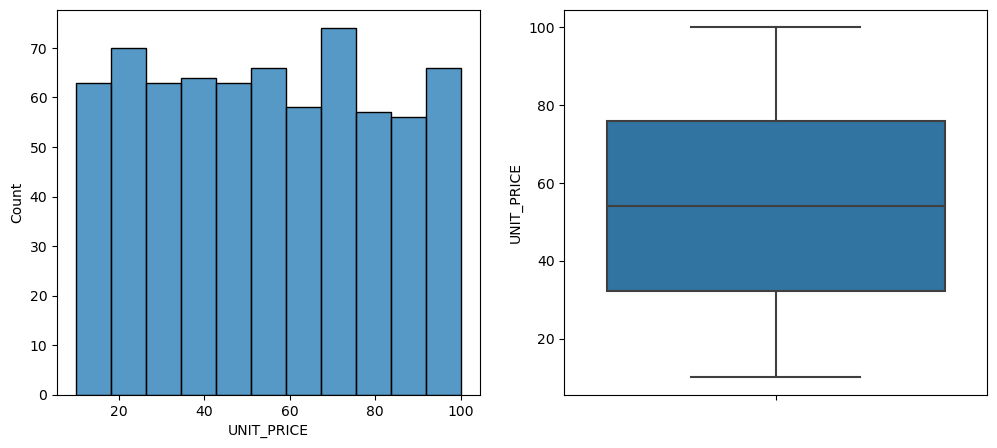

In [147]:
# Visualize data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=X_train_copy, x="UNIT_PRICE", ax=ax[0])
sns.boxplot(data=X_train_copy, y="UNIT_PRICE", ax=ax[1])

In [148]:
def visualize_numeric_feature(dataframe, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=dataframe, x=col_name, ax=ax[0])
    sns.boxplot(data=dataframe, y=col_name, ax=ax[1])

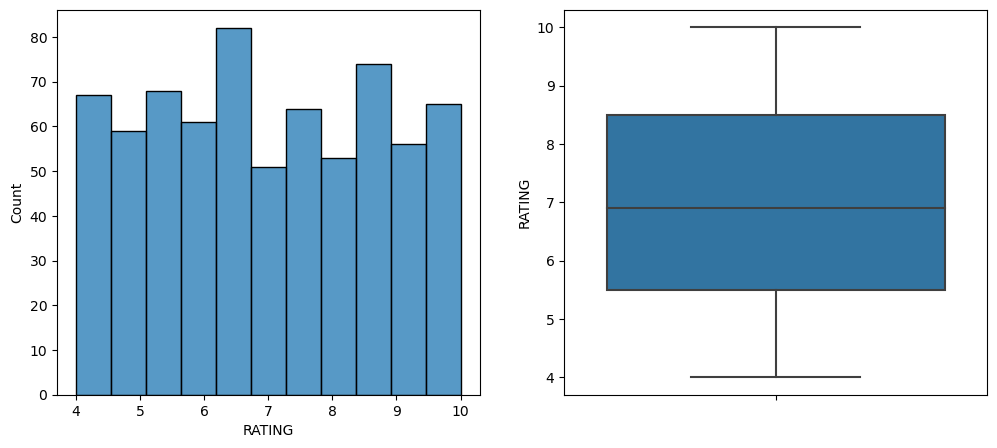

In [149]:
visualize_numeric_feature(X_train_copy, 'RATING')

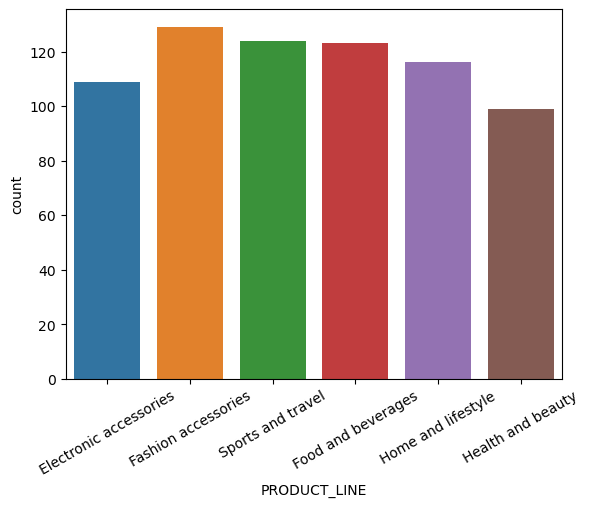

In [150]:
sns.countplot(data=X_train_copy, x="PRODUCT_LINE")
plt.xticks(rotation=30);

In [151]:
cat_feature = X_train_copy.select_dtypes(include=["object"])
cat_feature.head()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,DATE,TIME,PAYMENT
554,A,Yangon,Member,Male,Electronic accessories,3/25/2019,18:51,Cash
172,C,Naypyitaw,Normal,Male,Electronic accessories,3/3/2019,19:17,Cash
30,B,Mandalay,Normal,Male,Fashion accessories,2/25/2019,19:39,Credit card
772,C,Naypyitaw,Member,Female,Sports and travel,2/17/2019,16:50,Ewallet
230,B,Mandalay,Normal,Female,Fashion accessories,1/26/2019,19:28,Cash


In [152]:
cat_feature.describe()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,DATE,TIME,PAYMENT
count,700,700,700,700,700,700,700,700
unique,3,3,2,2,6,89,423,3
top,B,Mandalay,Member,Male,Fashion accessories,1/8/2019,19:48,Ewallet
freq,239,239,353,358,129,17,5,247


In [153]:
cat_feature.isnull().sum()

BRANCH           0
CITY             0
CUSTOMER_TYPE    0
GENDER           0
PRODUCT_LINE     0
DATE             0
TIME             0
PAYMENT          0
dtype: int64

In [154]:
pd.unique(cat_feature["PRODUCT_LINE"])

array(['Electronic accessories', 'Fashion accessories',
       'Sports and travel', 'Food and beverages', 'Home and lifestyle',
       'Health and beauty'], dtype=object)

In [155]:
#X_train_copy['Product_line'] = X_train_copy['Product_line'].map({
#    'Electronic accessories': 'EA',
#    'Health and beauty': 'HAB',
#    'Fashion accessories': 'FA',
#    'Sports and travel': 'SAT',
#    'Food and beverages': 'FAB',
#    'Home and lifestyle': 'HAL'
#})

#pd.unique(X_train_copy['Product_line'])

In [156]:
X_train_copy.groupby(by=['CITY', 'PRODUCT_LINE']).size()

CITY       PRODUCT_LINE          
Mandalay   Electronic accessories    37
           Fashion accessories       50
           Food and beverages        40
           Health and beauty         33
           Home and lifestyle        34
           Sports and travel         45
Naypyitaw  Electronic accessories    38
           Fashion accessories       48
           Food and beverages        45
           Health and beauty         33
           Home and lifestyle        31
           Sports and travel         36
Yangon     Electronic accessories    34
           Fashion accessories       31
           Food and beverages        38
           Health and beauty         33
           Home and lifestyle        51
           Sports and travel         43
dtype: int64

In [157]:
# Handling categorical data
cat_feats = X_train.select_dtypes(include=['object'])
cat_feats.head()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,DATE,TIME,PAYMENT
554,A,Yangon,Member,Male,Electronic accessories,3/25/2019,18:51,Cash
172,C,Naypyitaw,Normal,Male,Electronic accessories,3/3/2019,19:17,Cash
30,B,Mandalay,Normal,Male,Fashion accessories,2/25/2019,19:39,Credit card
772,C,Naypyitaw,Member,Female,Sports and travel,2/17/2019,16:50,Ewallet
230,B,Mandalay,Normal,Female,Fashion accessories,1/26/2019,19:28,Cash


In [158]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [159]:
ohe_feature_name = ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_name

array(['BRANCH_A', 'BRANCH_B', 'BRANCH_C', 'CITY_Mandalay',
       'CITY_Naypyitaw', 'CITY_Yangon', 'CUSTOMER_TYPE_Member',
       'CUSTOMER_TYPE_Normal', 'GENDER_Female', 'GENDER_Male',
       'PRODUCT_LINE_Electronic accessories',
       'PRODUCT_LINE_Fashion accessories',
       'PRODUCT_LINE_Food and beverages',
       'PRODUCT_LINE_Health and beauty',
       'PRODUCT_LINE_Home and lifestyle',
       'PRODUCT_LINE_Sports and travel', 'DATE_1/1/2019',
       'DATE_1/10/2019', 'DATE_1/11/2019', 'DATE_1/12/2019',
       'DATE_1/13/2019', 'DATE_1/14/2019', 'DATE_1/15/2019',
       'DATE_1/16/2019', 'DATE_1/17/2019', 'DATE_1/18/2019',
       'DATE_1/19/2019', 'DATE_1/2/2019', 'DATE_1/20/2019',
       'DATE_1/21/2019', 'DATE_1/22/2019', 'DATE_1/23/2019',
       'DATE_1/24/2019', 'DATE_1/25/2019', 'DATE_1/26/2019',
       'DATE_1/27/2019', 'DATE_1/28/2019', 'DATE_1/29/2019',
       'DATE_1/3/2019', 'DATE_1/30/2019', 'DATE_1/31/2019',
       'DATE_1/4/2019', 'DATE_1/5/2019', 'DATE_1/6/2019

In [160]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,UNIT_PRICE,QUANTITY,TAX_5%,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING
0,19.32,7,6.7620,135.24,4.761905,6.7620,6.9
1,20.85,8,8.3400,166.80,4.761905,8.3400,6.3
2,94.13,5,23.5325,470.65,4.761905,23.5325,4.8
3,67.99,7,23.7965,475.93,4.761905,23.7965,5.7
4,81.37,2,8.1370,162.74,4.761905,8.1370,6.5


In [161]:
cat_feats_train = X_train.select_dtypes(include=['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_name)
X_train_cat_ohe.head()

,BRANCH_A,BRANCH_B,BRANCH_C,CITY_Mandalay,CITY_Naypyitaw,CITY_Yangon,CUSTOMER_TYPE_Member,CUSTOMER_TYPE_Normal,GENDER_Female,GENDER_Male,...,TIME_20:47,TIME_20:48,TIME_20:50,TIME_20:51,TIME_20:54,TIME_20:55,TIME_20:57,PAYMENT_Cash,PAYMENT_Credit card,PAYMENT_Ewallet
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [162]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,UNIT_PRICE,QUANTITY,TAX_5%,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING,BRANCH_A,BRANCH_B,BRANCH_C,...,TIME_20:47,TIME_20:48,TIME_20:50,TIME_20:51,TIME_20:54,TIME_20:55,TIME_20:57,PAYMENT_Cash,PAYMENT_Credit card,PAYMENT_Ewallet
0,19.32,7,6.7620,135.24,4.761905,6.7620,6.9,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20.85,8,8.3400,166.80,4.761905,8.3400,6.3,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,94.13,5,23.5325,470.65,4.761905,23.5325,4.8,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,67.99,7,23.7965,475.93,4.761905,23.7965,5.7,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,81.37,2,8.1370,162.74,4.761905,8.1370,6.5,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [163]:
final_columns = X_train_final.columns.values
final_columns

array(['UNIT_PRICE', 'QUANTITY', 'TAX_5%', 'COGS',
       'GROSS_MARGIN_PERCENTAGE', 'GROSS_INCOME', 'RATING', 'BRANCH_A',
       'BRANCH_B', 'BRANCH_C', 'CITY_Mandalay', 'CITY_Naypyitaw',
       'CITY_Yangon', 'CUSTOMER_TYPE_Member', 'CUSTOMER_TYPE_Normal',
       'GENDER_Female', 'GENDER_Male',
       'PRODUCT_LINE_Electronic accessories',
       'PRODUCT_LINE_Fashion accessories',
       'PRODUCT_LINE_Food and beverages',
       'PRODUCT_LINE_Health and beauty',
       'PRODUCT_LINE_Home and lifestyle',
       'PRODUCT_LINE_Sports and travel', 'DATE_1/1/2019',
       'DATE_1/10/2019', 'DATE_1/11/2019', 'DATE_1/12/2019',
       'DATE_1/13/2019', 'DATE_1/14/2019', 'DATE_1/15/2019',
       'DATE_1/16/2019', 'DATE_1/17/2019', 'DATE_1/18/2019',
       'DATE_1/19/2019', 'DATE_1/2/2019', 'DATE_1/20/2019',
       'DATE_1/21/2019', 'DATE_1/22/2019', 'DATE_1/23/2019',
       'DATE_1/24/2019', 'DATE_1/25/2019', 'DATE_1/26/2019',
       'DATE_1/27/2019', 'DATE_1/28/2019', 'DATE_1/29/2019',
    

In [164]:
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_name)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis=1)
X_test_final = X_test_final[final_columns]

X_test_final.head()

,UNIT_PRICE,QUANTITY,TAX_5%,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING,BRANCH_A,BRANCH_B,BRANCH_C,...,TIME_20:47,TIME_20:48,TIME_20:50,TIME_20:51,TIME_20:54,TIME_20:55,TIME_20:57,PAYMENT_Cash,PAYMENT_Credit card,PAYMENT_Ewallet
0,72.50,8,29.0000,580.00,4.761905,29.0000,9.2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,58.03,2,5.8030,116.06,4.761905,5.8030,8.8,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41.50,4,8.3000,166.00,4.761905,8.3000,8.2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56.04,10,28.0200,560.40,4.761905,28.0200,4.4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12.09,1,0.6045,12.09,4.761905,0.6045,8.2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: xlabel='TOTAL', ylabel='Count'>

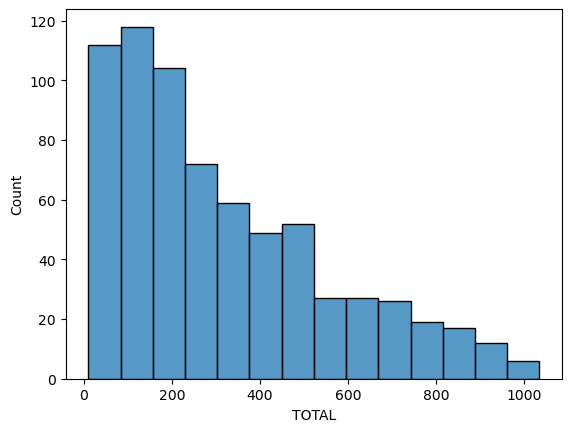

In [165]:
# Modeling

sns.histplot(y_train)

In [166]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_validate

In [167]:
def train_and_eval_model(model, X_train, y_train, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'), )
    print('Model', model)
    r2_scores = cv_results['test_r2']
    print("R2 CV scores:", r2_scores)
    print("R2 CV scores mean / stdev:", np.mean(r2_scores), '/', np.std(r2_scores))
    
    rmse = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1*score for score in rmse]
    print("RMSE CV scores:", rmse_scores)
    print("RMSE CV scores mean / stdev:", np.mean(rmse_scores), '/', np.std(rmse_scores))
    

In [168]:
rf = RandomForestRegressor(random_state=seed)
train_and_eval_model(model=rf, X_train=X_train_final, y_train=y_train)

Model RandomForestRegressor(random_state=150)
R2 CV scores: [0.99989978 0.99993747 0.99983339 0.99991695 0.99994515]
R2 CV scores mean / stdev: 0.9999065472900268 / 3.9881593210642324e-05
RMSE CV scores: [2.4496441109497322, 1.878930903988055, 3.108612990956089, 2.1543237677276563, 1.7884610221070671]
RMSE CV scores mean / stdev: 2.2759945591457202 / 0.4761428141431886


In [169]:
gb = GradientBoostingRegressor(random_state=seed)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model GradientBoostingRegressor(random_state=150)
R2 CV scores: [0.99988404 0.99991566 0.99985167 0.99993653 0.99990464]
R2 CV scores mean / stdev: 0.9998985089623694 / 2.8914828540266734e-05
RMSE CV scores: [2.6349941951128746, 2.182131422185563, 2.933078535257792, 1.8832714584388297, 2.3582237210894577]
RMSE CV scores mean / stdev: 2.3983398664169036 / 0.36210539256249774


In [170]:
hgb = HistGradientBoostingRegressor(random_state=seed)
train_and_eval_model(model=hgb, X_train=X_train_final, y_train=y_train)

Model HistGradientBoostingRegressor(random_state=150)
R2 CV scores: [0.99921361 0.99921302 0.99816811 0.99927204 0.99935772]
R2 CV scores mean / stdev: 0.9990449023269002 / 0.00044157497102264404
RMSE CV scores: [6.861822106291446, 6.6657022116404026, 10.307776088832842, 6.377979859694687, 6.120233732819488]
RMSE CV scores mean / stdev: 7.266702799855773 / 1.5412641965624048


In [171]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=seed)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=150, ...)
R2 CV scores: [0.99948434 0.9994801  0.99925865 0.99959652 0.99950634]
R2 CV scores mean / stdev: 0.9994651891531097 / 0.00011152411832812633
RMSE CV scores: [5.556542695170153, 5.417846112737617, 6.55731536898219, 4.748301844526068, 5.365654410802266]
R

In [172]:
xgr.fit(X_train_final, y_train)
y_pred = xgr.predict(X_test_final)

R2 Score: 0.9996660553464364
RMSE Score: 4.686243363487197


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

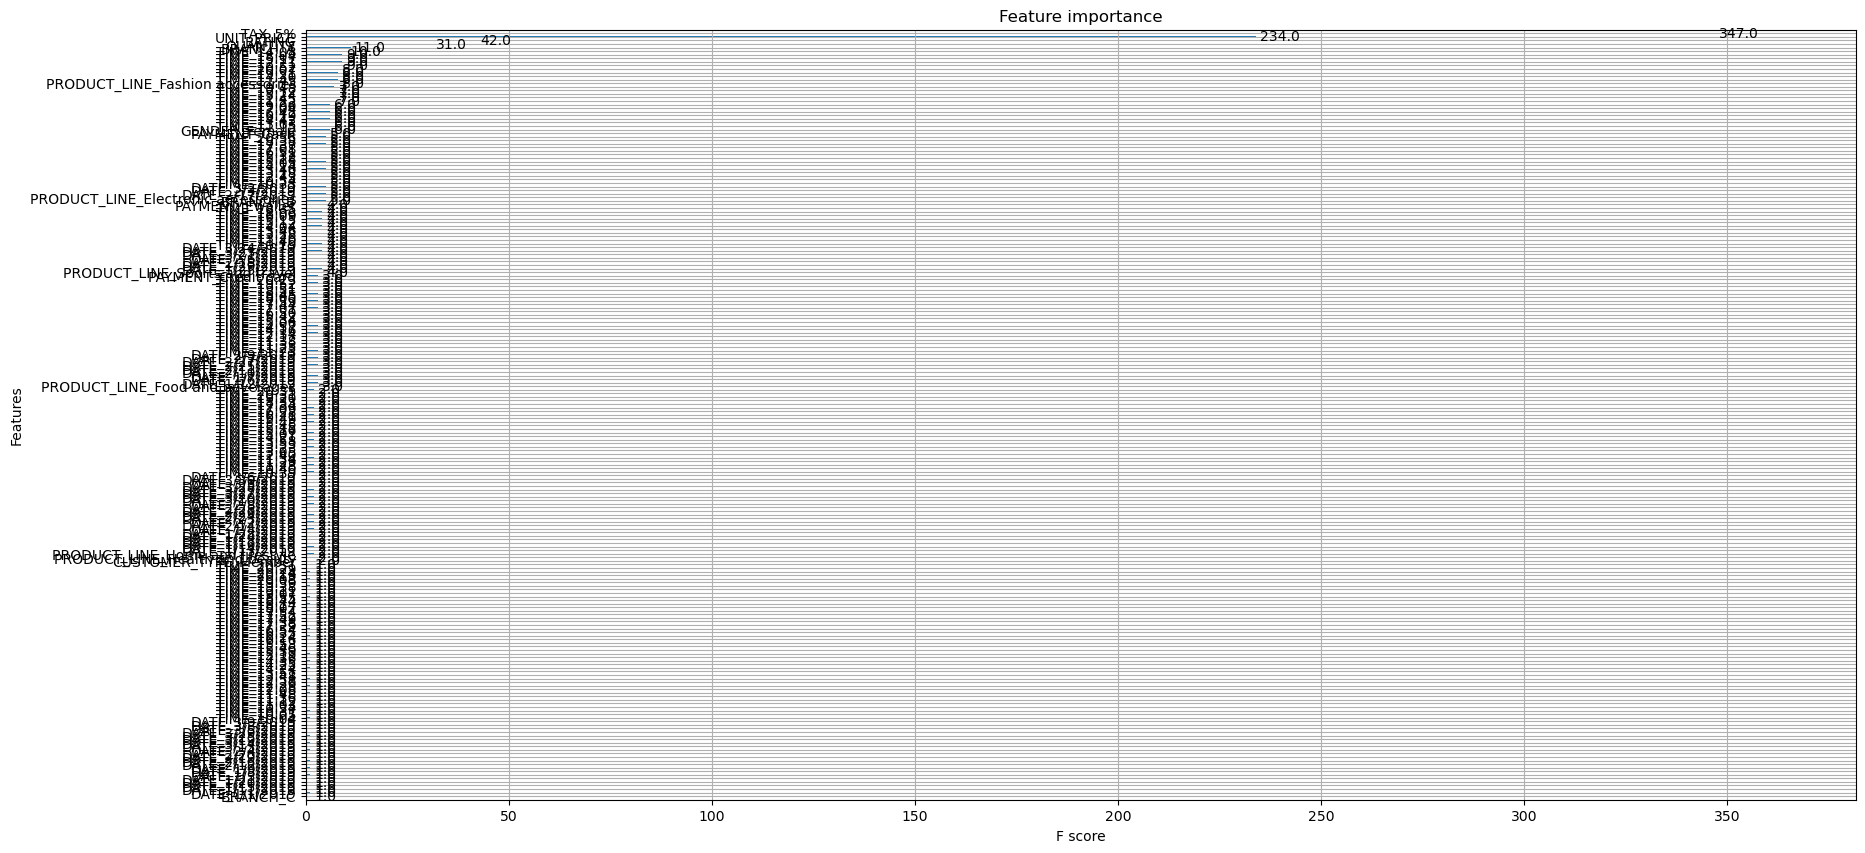

In [173]:
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import plot_importance

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE Score:", mean_squared_error(y_test, y_pred, squared=False))

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot_importance(xgr, ax=ax)